In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random  
import numpy as np
import seaborn as sns
from scipy import stats
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')
from scipy import stats  
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def jude_KS(data):  
    u =data.mean()  # 计算均值  
    std=data.std() ##计算标准差  
    p=stats.kstest(data, 'norm', (u, std))  
    return p

plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
def remove_outliers_3sigma(data):
    """
    使用 3σ 准则清理数据中的异常值
    """
    data_mean = np.mean(data)
    data_std = np.std(data)
    low_bound = data_mean - 3 * data_std
    high_bound = data_mean + 3 * data_std
    cleaned = [x for x in data if (x > low_bound) and (x < high_bound)]
    return cleaned

{'whiskers': [<matplotlib.lines.Line2D at 0x20280ef4f40>,
 'caps': [<matplotlib.lines.Line2D at 0x20280f0b520>,
 'boxes': [<matplotlib.lines.Line2D at 0x20280ef4c70>],
 'medians': [<matplotlib.lines.Line2D at 0x20280f0bac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20280f0bd90>],
 'means': []}

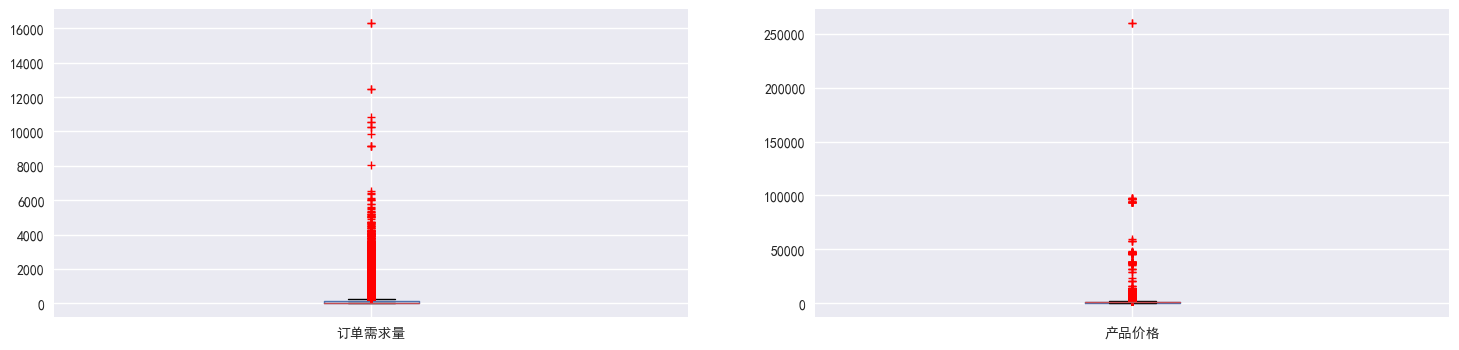

In [6]:
data = pd.read_csv('./数据预处理后的文件.csv')
final_test_df = pd.read_csv('./predict_sku1.csv')
data = data.iloc[:,1:]
fig,ax = plt.subplots(1,2,figsize=(18,4))
data['订单需求量'].plot.box(sym='r+',return_type='dict',ax=ax[0])
data['产品价格'].plot.box(sym='r+',return_type='dict',ax=ax[1])
# data['销售渠道名称']=data['销售渠道名称'].apply(lambda x:
#                                    2 if x==1
#                                    else 1)


In [4]:
# df=data.copy(deep=True)

# cols = ['产品价格', '订单需求量']
# mean = df[cols].mean(axis=0)
# std = df[cols].std(axis=0)
# low_bound = mean - 3 * std
# high_bound = mean + 3 * std

# idx = (df[cols[0]] >= low_bound[0]) & (df[cols[0]] <= high_bound[0]) & (df[cols[1]] >= low_bound[1]) & (df[cols[1]] <= high_bound[1])
# df = df[idx]

# data=df.copy(deep=True)

In [5]:
data

,订单日期,销售区域编码,产品编码,产品大类编码,产品细类编码,销售渠道名称,产品价格,季节,月时间段,促销期,是否为节假日,year,month,day,订单需求量
0,2015-09-01,104,22069,307,403,0,1114.0,3,1,0,0,2015,9,1,19
1,2015-09-01,104,20028,301,405,0,1012.0,3,1,0,0,2015,9,1,12
2,2015-09-02,104,21183,307,403,1,428.0,3,1,0,0,2015,9,2,109
3,2015-09-02,104,20448,308,404,1,962.0,3,1,0,0,2015,9,2,3
4,2015-09-02,104,21565,307,403,0,1400.0,3,1,0,0,2015,9,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597377,2018-12-20,102,20994,302,408,0,843.0,4,2,0,0,2018,12,20,59
597378,2018-12-20,102,21875,302,408,0,762.0,4,2,0,0,2018,12,20,502
597379,2018-12-20,102,20215,302,408,0,2013.0,4,2,0,0,2018,12,20,106
597380,2018-12-20,102,20195,302,408,0,2120.0,4,2,0,0,2018,12,20,187


In [6]:
data

,订单日期,销售区域编码,产品编码,产品大类编码,产品细类编码,销售渠道名称,产品价格,季节,月时间段,促销期,是否为节假日,year,month,day,订单需求量
0,2015-09-01,104,22069,307,403,0,1114.0,3,1,0,0,2015,9,1,19
1,2015-09-01,104,20028,301,405,0,1012.0,3,1,0,0,2015,9,1,12
2,2015-09-02,104,21183,307,403,1,428.0,3,1,0,0,2015,9,2,109
3,2015-09-02,104,20448,308,404,1,962.0,3,1,0,0,2015,9,2,3
4,2015-09-02,104,21565,307,403,0,1400.0,3,1,0,0,2015,9,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597377,2018-12-20,102,20994,302,408,0,843.0,4,2,0,0,2018,12,20,59
597378,2018-12-20,102,21875,302,408,0,762.0,4,2,0,0,2018,12,20,502
597379,2018-12-20,102,20215,302,408,0,2013.0,4,2,0,0,2018,12,20,106
597380,2018-12-20,102,20195,302,408,0,2120.0,4,2,0,0,2018,12,20,187


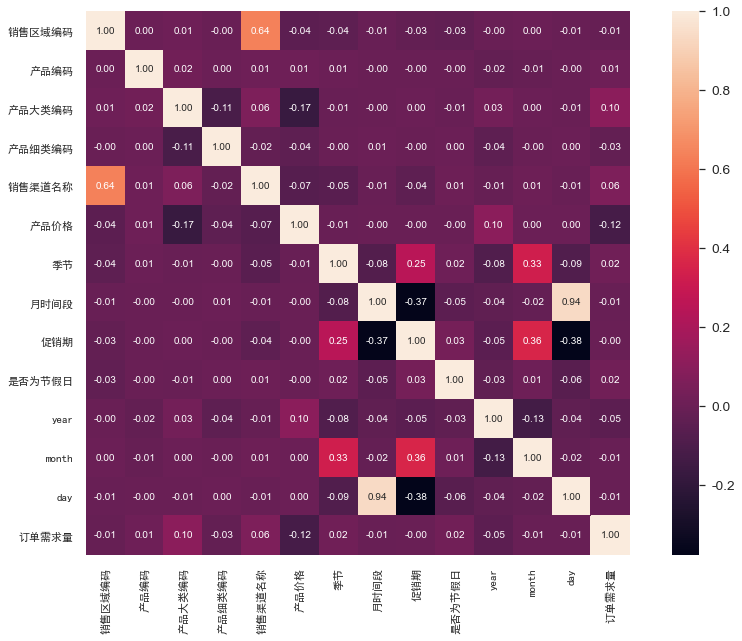

In [7]:
import seaborn as sns

sns.set(font='SimHei')
# 使用 seaborn 画热力图
data123=data.copy(deep=True)
data123 = data123.corr()
fig,ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(data123, 
                 cbar=True, 
                 annot=True, # 注入数字
                 square=True, # 单元格为正方形
                 fmt='.2f',   # 字符串格式代码
                  annot_kws={'size': 10} # 当annot为True时，ax.text的关键字参数，即注入数字的字体大小
                  )
plt.show()


In [8]:
# create time series period features
def time_period_features(df, time_col):
    # month level
    df['month'] = df['订单日期'].dt.month
    # quarter level
    df['quarter'] = df['订单日期'].dt.quarter
    # year level
    df['year'] = df['订单日期'].dt.year
    return df

data['订单日期'] = pd.to_datetime(data['订单日期'])
all_info_df = time_period_features(data, 'date')
print(all_info_df.info())
all_info_df
# cols = all_info_df.columns.tolist()
# cols.append(cols.pop(cols.index('产品价格')))
# all_info_df = all_info_df.reindex(columns=cols)
# all_info_df=all_info_df.rename(columns={'产品价格':'e'})
all_info_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597382 entries, 0 to 597381
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   订单日期     597382 non-null  datetime64[ns]
 1   销售区域编码   597382 non-null  int64         
 2   产品编码     597382 non-null  int64         
 3   产品大类编码   597382 non-null  int64         
 4   产品细类编码   597382 non-null  int64         
 5   销售渠道名称   597382 non-null  int64         
 6   产品价格     597382 non-null  float64       
 7   季节       597382 non-null  int64         
 8   月时间段     597382 non-null  int64         
 9   促销期      597382 non-null  int64         
 10  是否为节假日   597382 non-null  int64         
 11  year     597382 non-null  int64         
 12  month    597382 non-null  int64         
 13  day      597382 non-null  int64         
 14  订单需求量    597382 non-null  int64         
 15  quarter  597382 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(14)
memory usage

,订单日期,销售区域编码,产品编码,产品大类编码,产品细类编码,销售渠道名称,产品价格,季节,月时间段,促销期,是否为节假日,year,month,day,订单需求量,quarter
0,2015-09-01,104,22069,307,403,0,1114.0,3,1,0,0,2015,9,1,19,3
1,2015-09-01,104,20028,301,405,0,1012.0,3,1,0,0,2015,9,1,12,3
2,2015-09-02,104,21183,307,403,1,428.0,3,1,0,0,2015,9,2,109,3
3,2015-09-02,104,20448,308,404,1,962.0,3,1,0,0,2015,9,2,3,3
4,2015-09-02,104,21565,307,403,0,1400.0,3,1,0,0,2015,9,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597377,2018-12-20,102,20994,302,408,0,843.0,4,2,0,0,2018,12,20,59,4
597378,2018-12-20,102,21875,302,408,0,762.0,4,2,0,0,2018,12,20,502,4
597379,2018-12-20,102,20215,302,408,0,2013.0,4,2,0,0,2018,12,20,106,4
597380,2018-12-20,102,20195,302,408,0,2120.0,4,2,0,0,2018,12,20,187,4


In [9]:
sales_per_month = pd.pivot_table(
    data=all_info_df, values=[
       u'订单需求量', u'产品价格',u'销售渠道名称',u'月时间段'], index=[
            '销售区域编码', '产品编码', '产品大类编码','产品细类编码'], columns=[
                'year', 'month'], aggfunc={
                    '订单需求量': 'sum', '产品价格': 'mean','销售渠道名称':'sum',u'月时间段':'sum'})
# sales_per_month.fillna(value=0,inplace=True)
# print(sales_per_month.info())
col_order=[('订单需求量', 2015,  9),
            ('订单需求量', 2015, 10),
            ('订单需求量', 2015, 11),
            ('订单需求量', 2015, 12),
            ('订单需求量', 2016,  1),
            ('订单需求量', 2016,  2),
            ('订单需求量', 2016,  3),
            ('订单需求量', 2016,  4),
            ('订单需求量', 2016,  5),
            ('订单需求量', 2016,  6),
            ('订单需求量', 2016,  7),
            ('订单需求量', 2016,  8),
            ('订单需求量', 2016,  9),
            ('订单需求量', 2016, 10),
            ('订单需求量', 2016, 11),
            ('订单需求量', 2016, 12),
            ('订单需求量', 2017,  1),
            ('订单需求量', 2017,  2),
            ('订单需求量', 2017,  3),
            ('订单需求量', 2017,  4),
            ('订单需求量', 2017,  5),
            ('订单需求量', 2017,  6),
            ('订单需求量', 2017,  7),
            ('订单需求量', 2017,  8),
            ('订单需求量', 2017,  9),
            ('订单需求量', 2017, 10),
            ('订单需求量', 2017, 11),
            ('订单需求量', 2017, 12),
            ('订单需求量', 2018,  1),
            ('订单需求量', 2018,  2),
            ('订单需求量', 2018,  3),
            ('订单需求量', 2018,  4),
            ('订单需求量', 2018,  5),
            ('订单需求量', 2018,  6),
            ('订单需求量', 2018,  7),
            ('订单需求量', 2018,  8),
            ('订单需求量', 2018,  9),
            ('订单需求量', 2018, 10),
            ('订单需求量', 2018, 11),
            ('订单需求量', 2018, 12),
            ( '产品价格', 2015,  9),
            ( '产品价格', 2015, 10),
            ( '产品价格', 2015, 11),
            ( '产品价格', 2015, 12),
            ( '产品价格', 2016,  1),
            ( '产品价格', 2016,  2),
            ( '产品价格', 2016,  3),
            ( '产品价格', 2016,  4),
            ( '产品价格', 2016,  5),
            ( '产品价格', 2016,  6),
            ( '产品价格', 2016,  7),
            ( '产品价格', 2016,  8),
            ( '产品价格', 2016,  9),
            ( '产品价格', 2016, 10),
            ( '产品价格', 2016, 11),
            ( '产品价格', 2016, 12),
            ( '产品价格', 2017,  1),
            ( '产品价格', 2017,  2),
            ( '产品价格', 2017,  3),
            ( '产品价格', 2017,  4),
            ( '产品价格', 2017,  5),
            ( '产品价格', 2017,  6),
            ( '产品价格', 2017,  7),
            ( '产品价格', 2017,  8),
            ( '产品价格', 2017,  9),
            ( '产品价格', 2017, 10),
            ( '产品价格', 2017, 11),
            ( '产品价格', 2017, 12),
            ( '产品价格', 2018,  1),
            ( '产品价格', 2018,  2),
            ( '产品价格', 2018,  3),
            ( '产品价格', 2018,  4),
            ( '产品价格', 2018,  5),
            ( '产品价格', 2018,  6),
            ( '产品价格', 2018,  7),
            ( '产品价格', 2018,  8),
            ( '产品价格', 2018,  9),
            ( '产品价格', 2018, 10),
            ( '产品价格', 2018, 11),
            ( '产品价格', 2018, 12),
            ( '销售渠道名称', 2015,  9),
            ( '销售渠道名称', 2015, 10),
            ( '销售渠道名称', 2015, 11),
            ( '销售渠道名称', 2015, 12),
            ( '销售渠道名称', 2016,  1),
            ( '销售渠道名称', 2016,  2),
            ( '销售渠道名称', 2016,  3),
            ( '销售渠道名称', 2016,  4),
            ( '销售渠道名称', 2016,  5),
            ( '销售渠道名称', 2016,  6),
            ( '销售渠道名称', 2016,  7),
            ( '销售渠道名称', 2016,  8),
            ( '销售渠道名称', 2016,  9),
            ( '销售渠道名称', 2016, 10),
            ( '销售渠道名称', 2016, 11),
            ( '销售渠道名称', 2016, 12),
            ( '销售渠道名称', 2017,  1),
            ( '销售渠道名称', 2017,  2),
            ( '销售渠道名称', 2017,  3),
            ( '销售渠道名称', 2017,  4),
            ( '销售渠道名称', 2017,  5),
            ( '销售渠道名称', 2017,  6),
            ( '销售渠道名称', 2017,  7),
            ( '销售渠道名称', 2017,  8),
            ( '销售渠道名称', 2017,  9),
            ( '销售渠道名称', 2017, 10),
            ( '销售渠道名称', 2017, 11),
            ( '销售渠道名称', 2017, 12),
            ( '销售渠道名称', 2018,  1),
            ( '销售渠道名称', 2018,  2),
            ( '销售渠道名称', 2018,  3),
            ( '销售渠道名称', 2018,  4),
            ( '销售渠道名称', 2018,  5),
            ( '销售渠道名称', 2018,  6),
            ( '销售渠道名称', 2018,  7),
            ( '销售渠道名称', 2018,  8),
            ( '销售渠道名称', 2018,  9),
            ( '销售渠道名称', 2018, 10),
            ( '销售渠道名称', 2018, 11),
            ( '销售渠道名称', 2018, 12),
            ('月时间段', 2015,  9),
            ('月时间段', 2015, 10),
            ('月时间段', 2015, 11),
            ('月时间段', 2015, 12),
            ('月时间段', 2016,  1),
            ('月时间段', 2016,  2),
            ('月时间段', 2016,  3),
            ('月时间段', 2016,  4),
            ('月时间段', 2016,  5),
            ('月时间段', 2016,  6),
            ('月时间段', 2016,  7),
            ('月时间段', 2016,  8),
            ('月时间段', 2016,  9),
            ('月时间段', 2016, 10),
            ('月时间段', 2016, 11),
            ('月时间段', 2016, 12),
            ('月时间段', 2017,  1),
            ('月时间段', 2017,  2),
            ('月时间段', 2017,  3),
            ('月时间段', 2017,  4),
            ('月时间段', 2017,  5),
            ('月时间段', 2017,  6),
            ('月时间段', 2017,  7),
            ('月时间段', 2017,  8),
            ('月时间段', 2017,  9),
            ('月时间段', 2017, 10),
            ('月时间段', 2017, 11),
            ('月时间段', 2017, 12),
            ('月时间段', 2018,  1),
            ('月时间段', 2018,  2),
            ('月时间段', 2018,  3),
            ('月时间段', 2018,  4),
            ('月时间段', 2018,  5),
            ('月时间段', 2018,  6),
            ('月时间段', 2018,  7),
            ('月时间段', 2018,  8),
            ('月时间段', 2018,  9),
            ('月时间段', 2018, 10),
            ('月时间段', 2018, 11),
            ('月时间段', 2018, 12),]

sales_per_month=sales_per_month.reindex(col_order, axis=1)
sales_per_month

订单需求量                                            \
year                           2015                              2016           
month                            9        10       11      12      1       2    
销售区域编码 产品编码  产品大类编码 产品细类编码                                                      
101    20001 302    408         NaN      NaN      NaN     NaN     NaN     NaN   
       20002 303    406         NaN      NaN      NaN     NaN     NaN     NaN   
       20003 301    405         NaN      NaN      NaN     NaN     NaN     NaN   
       20005 306    407         NaN      NaN      7.0     NaN     3.0     NaN   
       20006 307    403         NaN      NaN      NaN     NaN     NaN     NaN   
...                             ...      ...      ...     ...     ...     ...   
105    22080 306    407     10411.0  13282.0  10276.0  4432.0  9791.0  6129.0   
       22081 303    401         NaN      NaN      NaN     NaN     NaN     NaN   
       22082 305    412         NaN      NaN      NaN     NaN     4.0     NaN   
       22083 303    401         NaN      NaN      NaN     NaN     NaN     NaN   
       22084 302    408         NaN      NaN      NaN     NaN     NaN     NaN   

                                                              ...  月时间段        \
year                                                          ...  2018         
month                            3       4        5       6   ...    3     4    
销售区域编码 产品编码  产品大类编码 产品细类编码                                    ...               
101    20001 302    408       397.0     NaN    511.0     NaN  ...   NaN   NaN   
       20002 303    406         NaN     NaN      NaN     NaN  ...  10.0  33.0   
       20003 301    405         NaN     NaN      NaN     NaN  ...  25.0  21.0   
       20005 306    407         NaN     NaN      NaN     9.0  ...   NaN   NaN   
       20006 307    403         NaN     NaN      NaN     NaN  ...  18.0   5.0   
...                             ...     ...      ...     ...  ...   ...   ...   
105    22080 306    407     13708.0  4240.0  14461.0  3589.0  ...   NaN   NaN   
       22081 303    401         NaN     NaN      NaN     NaN  ...  14.0   8.0   
       22082 305    412         NaN     NaN      NaN     NaN  ...   NaN   NaN   
       22083 303    401         NaN     NaN      NaN     NaN  ...   NaN   NaN   
       22084 302    408         NaN     NaN      NaN     NaN  ...   NaN   NaN   

                                                                            
year                                                                        
month                         5     6     7     8     9     10    11    12  
销售区域编码 产品编码  产品大类编码 产品细类编码                                                  
101    20001 302    408      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
       20002 303    406     28.0  18.0  10.0   7.0  11.0   2.0   6.0   8.0  
       20003 301    405     24.0  16.0   6.0   8.0   6.0   9.0   NaN   2.0  
       20005 306    407      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
       20006 307    403     18.0   3.0  13.0   5.0   8.0   2.0   1.0   4.0  
...                          ...   ...   ...   ...   ...   ...   ...   ...  
105    22080 306    407      2.0   NaN   6.0   2.0   NaN   NaN   NaN   2.0  
       22081 303    401     14.0   6.0   9.0   5.0  15.0  10.0   4.0   2.0  
       22082 305    412      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
       22083 303    401      NaN   NaN   6.0  80.0  83.0  94.0  78.0  24.0  
       22084 302    408      NaN   NaN   NaN   9.0   8.0   2.0   NaN   NaN  

[5366 rows x 160 columns]

In [10]:
list(sales_per_month.columns)

[('订单需求量', 2015, 9),
 ('订单需求量', 2015, 10),
 ('订单需求量', 2015, 11),
 ('订单需求量', 2015, 12),
 ('订单需求量', 2016, 1),
 ('订单需求量', 2016, 2),
 ('订单需求量', 2016, 3),
 ('订单需求量', 2016, 4),
 ('订单需求量', 2016, 5),
 ('订单需求量', 2016, 6),
 ('订单需求量', 2016, 7),
 ('订单需求量', 2016, 8),
 ('订单需求量', 2016, 9),
 ('订单需求量', 2016, 10),
 ('订单需求量', 2016, 11),
 ('订单需求量', 2016, 12),
 ('订单需求量', 2017, 1),
 ('订单需求量', 2017, 2),
 ('订单需求量', 2017, 3),
 ('订单需求量', 2017, 4),
 ('订单需求量', 2017, 5),
 ('订单需求量', 2017, 6),
 ('订单需求量', 2017, 7),
 ('订单需求量', 2017, 8),
 ('订单需求量', 2017, 9),
 ('订单需求量', 2017, 10),
 ('订单需求量', 2017, 11),
 ('订单需求量', 2017, 12),
 ('订单需求量', 2018, 1),
 ('订单需求量', 2018, 2),
 ('订单需求量', 2018, 3),
 ('订单需求量', 2018, 4),
 ('订单需求量', 2018, 5),
 ('订单需求量', 2018, 6),
 ('订单需求量', 2018, 7),
 ('订单需求量', 2018, 8),
 ('订单需求量', 2018, 9),
 ('订单需求量', 2018, 10),
 ('订单需求量', 2018, 11),
 ('订单需求量', 2018, 12),
 ('产品价格', 2015, 9),
 ('产品价格', 2015, 10),
 ('产品价格', 2015, 11),
 ('产品价格', 2015, 12),
 ('产品价格', 2016, 1),
 ('产品价格', 2016, 2),
 ('产品价格', 2016, 3),
 ('产品

In [11]:
sales_per_month.fillna(0, inplace=True)
sales_per_month.reset_index(inplace=True)
sales_per_month

销售区域编码   产品编码 产品大类编码 产品细类编码    订单需求量                                    \
year                                  2015                              2016   
month                                    9       10       11      12       1   
0        101  20001    302    408      0.0      0.0      0.0     0.0     0.0   
1        101  20002    303    406      0.0      0.0      0.0     0.0     0.0   
2        101  20003    301    405      0.0      0.0      0.0     0.0     0.0   
3        101  20005    306    407      0.0      0.0      7.0     0.0     3.0   
4        101  20006    307    403      0.0      0.0      0.0     0.0     0.0   
...      ...    ...    ...    ...      ...      ...      ...     ...     ...   
5361     105  22080    306    407  10411.0  13282.0  10276.0  4432.0  9791.0   
5362     105  22081    303    401      0.0      0.0      0.0     0.0     0.0   
5363     105  22082    305    412      0.0      0.0      0.0     0.0     4.0   
5364     105  22083    303    401      0.0      0.0      0.0     0.0     0.0   
5365     105  22084    302    408      0.0      0.0      0.0     0.0     0.0   

               ...  月时间段                                                        
year           ...  2018                                                        
month       2  ...     3     4     5     6     7     8     9    10    11    12  
0         0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1         0.0  ...  10.0  33.0  28.0  18.0  10.0   7.0  11.0   2.0   6.0   8.0  
2         0.0  ...  25.0  21.0  24.0  16.0   6.0   8.0   6.0   9.0   0.0   2.0  
3         0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4         0.0  ...  18.0   5.0  18.0   3.0  13.0   5.0   8.0   2.0   1.0   4.0  
...       ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
5361   6129.0  ...   0.0   0.0   2.0   0.0   6.0   2.0   0.0   0.0   0.0   2.0  
5362      0.0  ...  14.0   8.0  14.0   6.0   9.0   5.0  15.0  10.0   4.0   2.0  
5363      0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5364      0.0  ...   0.0   0.0   0.0   0.0   6.0  80.0  83.0  94.0  78.0  24.0  
5365      0.0  ...   0.0   0.0   0.0   0.0   0.0   9.0   8.0   2.0   0.0   0.0  

[5366 rows x 164 columns]

In [12]:
print(sales_per_month.shape)

(5366, 164)


In [13]:
print(sales_per_month.shape)
print(final_test_df.shape)

(5366, 164)
(2619, 4)


In [14]:
def set_index(data_first):
    data_second = data_first.iloc[:,:]
    data_second=data_second.rename(columns={'order_date':'订单日期','sales_region_code':'销售区域编码','item_code':'产品编码',
                                           'first_cate_code':'产品大类编码','second_cate_code':'产品细类编码',
                                            'sales_chan_name':'销售渠道名称','item_price':'产品价格','ord_qty':'订单需求量'})
#     data_second.columns=['订单日期','销售区域编码','产品编码','产品大类编码','产品细类编码','销售渠道名称','产品价格','订单需求量']
    return data_second
final_test_df=set_index(final_test_df)
final_test_df

,销售区域编码,产品编码,产品大类编码,产品细类编码
0,101,20002,303,406
1,101,20003,301,405
2,101,20006,307,403
3,101,20011,303,401
4,101,20014,307,403
...,...,...,...,...
2614,105,22066,307,403
2615,105,22072,305,412
2616,105,22075,307,403
2617,105,22083,303,401


In [15]:
data.sort_values(by=['销售区域编码','产品编码'])

# 提取四个标签的种类
labels = ['销售区域编码', '产品编码', '产品大类编码', '产品细类编码']
label_groups = data[labels].groupby(labels).groups

# 得到所有组合类型
combinations = [list(group) for group in label_groups.keys()]

# 将组合类型转换为 DataFrame
df = pd.DataFrame(combinations, columns=labels)
df

,销售区域编码,产品编码,产品大类编码,产品细类编码
0,101,20001,302,408
1,101,20002,303,406
2,101,20003,301,405
3,101,20005,306,407
4,101,20006,307,403
...,...,...,...,...
5361,105,22080,306,407
5362,105,22081,303,401
5363,105,22082,305,412
5364,105,22083,303,401


In [16]:
final_test_df.head(10)

,销售区域编码,产品编码,产品大类编码,产品细类编码
0,101,20002,303,406
1,101,20003,301,405
2,101,20006,307,403
3,101,20011,303,401
4,101,20014,307,403
5,101,20016,303,401
6,101,20018,306,407
7,101,20020,305,412
8,101,20021,305,412
9,101,20024,306,402


In [17]:
full_shop_item_matrix=pd.merge(df,final_test_df,on=['销售区域编码','产品编码','产品大类编码','产品细类编码'],how='inner')
diff_df = pd.concat([df, final_test_df]).drop_duplicates(keep=False)
diff_df =diff_df.sort_values(['销售区域编码','产品编码'])
# diff_df.head(10)
full_shop_item_matrix= pd.concat([full_shop_item_matrix, diff_df])
# full_shop_item_matrix.head(10)
full_shop_item_matrix =full_shop_item_matrix.sort_values(['销售区域编码','产品编码'])
full_shop_item_matrix.head(10)

,销售区域编码,产品编码,产品大类编码,产品细类编码
0,101,20001,302,408
0,101,20002,303,406
1,101,20003,301,405
3,101,20005,306,407
2,101,20006,307,403
5,101,20007,305,412
6,101,20008,303,401
7,101,20009,306,407
3,101,20011,303,401
8,101,20012,306,407


In [18]:
for col in list(sales_per_month.columns)[3:]:
    sales_per_month[col] = sales_per_month[col].astype(np.float32)
print(sales_per_month.info())
sales_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5366 entries, 0 to 5365
Columns: 164 entries, ('销售区域编码', '', '') to ('月时间段', 2018, 12)
dtypes: float32(161), int64(3)
memory usage: 3.4 MB
None


销售区域编码   产品编码 产品大类编码 产品细类编码    订单需求量                                    \
year                                  2015                              2016   
month                                    9       10       11      12       1   
0        101  20001    302  408.0      0.0      0.0      0.0     0.0     0.0   
1        101  20002    303  406.0      0.0      0.0      0.0     0.0     0.0   
2        101  20003    301  405.0      0.0      0.0      0.0     0.0     0.0   
3        101  20005    306  407.0      0.0      0.0      7.0     0.0     3.0   
4        101  20006    307  403.0      0.0      0.0      0.0     0.0     0.0   
...      ...    ...    ...    ...      ...      ...      ...     ...     ...   
5361     105  22080    306  407.0  10411.0  13282.0  10276.0  4432.0  9791.0   
5362     105  22081    303  401.0      0.0      0.0      0.0     0.0     0.0   
5363     105  22082    305  412.0      0.0      0.0      0.0     0.0     4.0   
5364     105  22083    303  401.0      0.0      0.0      0.0     0.0     0.0   
5365     105  22084    302  408.0      0.0      0.0      0.0     0.0     0.0   

               ...  月时间段                                                        
year           ...  2018                                                        
month       2  ...     3     4     5     6     7     8     9    10    11    12  
0         0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1         0.0  ...  10.0  33.0  28.0  18.0  10.0   7.0  11.0   2.0   6.0   8.0  
2         0.0  ...  25.0  21.0  24.0  16.0   6.0   8.0   6.0   9.0   0.0   2.0  
3         0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4         0.0  ...  18.0   5.0  18.0   3.0  13.0   5.0   8.0   2.0   1.0   4.0  
...       ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
5361   6129.0  ...   0.0   0.0   2.0   0.0   6.0   2.0   0.0   0.0   0.0   2.0  
5362      0.0  ...  14.0   8.0  14.0   6.0   9.0   5.0  15.0  10.0   4.0   2.0  
5363      0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5364      0.0  ...   0.0   0.0   0.0   0.0   6.0  80.0  83.0  94.0  78.0  24.0  
5365      0.0  ...   0.0   0.0   0.0   0.0   0.0   9.0   8.0   2.0   0.0   0.0  

[5366 rows x 164 columns]

In [19]:
sales_per_month1 = pd.merge(left=sales_per_month,right= full_shop_item_matrix,on=['销售区域编码','产品编码','产品大类编码','产品细类编码'],how='right')


sales_per_month1
sales_per_month1 = pd.merge(left=sales_per_month1,
                           right=full_shop_item_matrix[['销售区域编码',
                                          '产品编码','产品大类编码','产品细类编码']],
                           left_on=[('销售区域编码',
                                     '',
                                     ''),'产品编码','产品大类编码','产品细类编码'],
                           right_on=['销售区域编码','产品编码','产品大类编码','产品细类编码'],
                           how='right')
sales_per_month1.drop([('产品编码', '', '')], axis=1, inplace=True)
sales_per_month1.drop([('产品大类编码', '', '')], axis=1, inplace=True)
sales_per_month1.drop([('产品细类编码', '', '')], axis=1, inplace=True)
sales_per_month1
for i in labels:
    sales_per_month1=sales_per_month1.rename(columns={i:(i, '', '')})
    
sales_per_month1=sales_per_month1.iloc[:,:-1]
sales_per_month1
# sales_per_month1.drop(['销售区域编码'], inplace=True, axis=1)
print(sales_per_month1.info())
sales_per_month1.fillna(value=0, inplace=True)
sales_per_month1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 5797
Columns: 164 entries, ('销售区域编码', '', '') to ('月时间段', 2018, 12)
dtypes: float32(160), float64(1), int64(3)
memory usage: 3.8 MB
None


,"(销售区域编码, , )","(产品编码, , )","(产品大类编码, , )","(产品细类编码, , )","(订单需求量, 2015, 9)","(订单需求量, 2015, 10)","(订单需求量, 2015, 11)","(订单需求量, 2015, 12)","(订单需求量, 2016, 1)","(订单需求量, 2016, 2)",...,"(月时间段, 2018, 3)","(月时间段, 2018, 4)","(月时间段, 2018, 5)","(月时间段, 2018, 6)","(月时间段, 2018, 7)","(月时间段, 2018, 8)","(月时间段, 2018, 9)","(月时间段, 2018, 10)","(月时间段, 2018, 11)","(月时间段, 2018, 12)"
0,101,20001,302,408.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,101,20002,303,406.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,33.0,28.0,18.0,10.0,7.0,11.0,2.0,6.0,8.0
2,101,20003,301,405.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,21.0,24.0,16.0,6.0,8.0,6.0,9.0,0.0,2.0
3,101,20005,306,407.0,0.0,0.0,7.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,101,20006,307,403.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,5.0,18.0,3.0,13.0,5.0,8.0,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,105,21964,303,410.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5794,105,22004,303,401.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5795,105,22008,308,404.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5796,105,22009,306,407.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
sales_per_month=sales_per_month1.copy(deep=True)
sales_per_month[sales_per_month[('产品编码','' , '')]==20011]

,"(销售区域编码, , )","(产品编码, , )","(产品大类编码, , )","(产品细类编码, , )","(订单需求量, 2015, 9)","(订单需求量, 2015, 10)","(订单需求量, 2015, 11)","(订单需求量, 2015, 12)","(订单需求量, 2016, 1)","(订单需求量, 2016, 2)",...,"(月时间段, 2018, 3)","(月时间段, 2018, 4)","(月时间段, 2018, 5)","(月时间段, 2018, 6)","(月时间段, 2018, 7)","(月时间段, 2018, 8)","(月时间段, 2018, 9)","(月时间段, 2018, 10)","(月时间段, 2018, 11)","(月时间段, 2018, 12)"
5366,101,20011,303,401.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5463,102,20011,303,401.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5562,103,20011,303,401.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5681,105,20011,303,401.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
def create_statistic_feature(df,prefix = ''):
    df[prefix+'_mean']=df.mean(axis=1)
    df[prefix+'_median']=df.median(axis=1)
    df[prefix+'_std']=df.std(axis=1)
    df[prefix+'_std'] =df.shape[1]- (df == 0).astype(int).sum(axis=1)
    return df
def porudct_sum(df1,df2,name = ''):
    sum_product = pd.DataFrame([])
    for i in range(df1.shape[1]):
        product = df1.iloc[:,i]*df2.iloc[:,i]
        if i ==0 :
            sum_product = product
        else:
            sum_product +=product
    sum_product.name = name
    return sum_product

In [22]:
import chinese_calendar
from chinese_calendar import is_workday
from chinese_calendar import is_holiday
import datetime
def is_weekday(date):
        '''
        判断是否为工作日
        '''
        Y = date.year
        M = date.month
        D = date.day
        april_last = datetime.date(Y, M, D)
        return is_workday(april_last)
def is_holidays(date):
        '''
        判断是否为节假日
        '''
        Y = date.year
        M = date.month
        D = date.day
#         print(Y)
        april_last = datetime.date(Y, M, D)
        return is_holiday(april_last)
time=pd.DataFrame(pd.date_range('2015-09-01','2019-03-31')).rename(columns={0:'订单日期'})
time['订单日期'] = pd.to_datetime(time['订单日期'])
time['year']=time['订单日期'].dt.year
time['month']=time['订单日期'].dt.month
time['day']=time['订单日期'].dt.day
# time['休息日']=0
# time['工作日']=0
# for i in range(len(time['日期'])):
#     time['休息日'][i]=is_holidays(time['日期'][0])
#     time['工作日'][i]=is_workday(time['日期'][0])

# time[time['日期']=='2015-10-02']

In [23]:
start_time = datetime.date(2015, 9, 1)  # 指定开始时间
end_time = datetime.date(2019, 3, 31)   # 指定结束时间
workdays = pd.DataFrame(chinese_calendar.get_workdays(start_time,end_time))
workdays = workdays.rename(columns={0:'日期'})
workdays['属性'] = '工作日'
workdays['日期'] = pd.to_datetime(workdays['日期'])
workdays
df = time.copy(deep=True)
df['订单日期'] = pd.to_datetime(df['订单日期']) # 将时间列转为datetime格式
df.set_index('订单日期', inplace=True) # 将时间列设置为索引

work = workdays['日期']

workday_series = pd.Series(index=df.index, data=0) # 初始化为0
workday_series[workday_series.index.isin(work)] = 1 # 修改日期为1

df = pd.concat([df, workday_series.rename('is_workday')], axis=1)#合并到总数据

workday_count = df['is_workday'].sum()
print('工作日的数量：', workday_count)
df['is_holiday']=df['is_workday']
df['is_holiday']=df['is_holiday'].apply(lambda x:
                                        1 if x==0
                                       else 0)
df

工作日的数量： 892


,year,month,day,is_workday,is_holiday
订单日期,,,,,
2015-09-01,2015,9,1,1,0
2015-09-02,2015,9,2,1,0
2015-09-03,2015,9,3,0,1
2015-09-04,2015,9,4,0,1
2015-09-05,2015,9,5,0,1
...,...,...,...,...,...
2019-03-27,2019,3,27,1,0
2019-03-28,2019,3,28,1,0
2019-03-29,2019,3,29,1,0


In [24]:
df_time=df.drop('day',axis=1)
df_time=df_time.groupby(['year','month']).sum()
df_time=df_time.reset_index().rename(columns={'is_workday':'工作日数量','is_holiday':'休息日数量'})
df_time

,year,month,工作日数量,休息日数量
0,2015,9,21,9
1,2015,10,18,13
2,2015,11,21,9
3,2015,12,23,8
4,2016,1,20,11
5,2016,2,18,11
6,2016,3,23,8
7,2016,4,20,10
8,2016,5,21,10
9,2016,6,21,9


In [25]:
a=['price_mean','sales_mean','total_profit','sales_0','sales_median','sales_1','sales_2']
b=['产品大类编码','产品细类编码']
c=[]
d=[]
r=['sales_0','sales_1','sales_2']
drop_list=['price_std','sales_std','total_profit_diff_month']

In [26]:
melt_data = pd.DataFrame([]) #创建一个空df
# print(sales_per_month.shape)
feature_start_index = 4 # 应为shop_id 和item_id 不会迭代变化
feature_loop_index = 3 # 设定采用几个月的数据作为feature，你可以修改，如果是40表示所有的过去的月份
one_catgory_feature_num = 40 # 每组（价格或者销售额）包含了24 个月份

for i in range(one_catgory_feature_num - feature_loop_index):
    id = sales_per_month.iloc[:, 0:feature_start_index]  #首先提取ID
    id.columns = ['销售区域编码','产品编码','产品大类编码','产品细类编码']  
#     cate_id = sales_per_month.iloc[:, -1]
#     cate_id.name = 'item_category_id'   # 提取类别ID
    sales = sales_per_month.iloc[:, feature_start_index +
                                 i:feature_start_index + feature_loop_index + i]
        
    
    sales.columns = [f'sales_{i}' for i in range(feature_loop_index)]  # 提取销售额
    
    price = sales_per_month.iloc[:, feature_start_index +
                                 i +
                                 one_catgory_feature_num:feature_start_index +
                                 feature_loop_index +
                                 i +
                                 one_catgory_feature_num]
    salesnum=sales_per_month.iloc[:, feature_start_index +
                                 i +
                                 one_catgory_feature_num*2:feature_start_index +
                                 feature_loop_index +
                                 i +
                                 one_catgory_feature_num*2]
#     month_period=sales_per_month.iloc[:, feature_start_index +
#                                  i +
#                                  one_catgory_feature_num*3:feature_start_index +
#                                  feature_loop_index +
#                                  i +
#                                  one_catgory_feature_num*3]
#     print(salesnum)
#     print(price)
    price.columns = [f'price_{i}' for i in range(feature_loop_index)] # 提取价格
    price['year'] = list(sales_per_month.columns)[feature_start_index + i + 3][1]  # 提取年份
    price['month'] = list(sales_per_month.columns)[feature_start_index + i + 3][2] # 提取月份
#     print(price)
#     print(price['year'],price['month'])
    salesnum.columns = [f'salesnum_{i}' for i in range(feature_loop_index)] # 提取销售渠道和
#     month_period.columns = [f'month_period_{i}' for i in range(feature_loop_index)] # 提取月时间段和
#     salesnum['year'] = list(sales_per_month.columns)[feature_start_index + i + 3 + 3][1]  # 提取年份
#     salesnum['month'] = list(sales_per_month.columns)[feature_start_index + i + 3 + 3][2] # 提取月份
    
#     print(salesnum)
    total_profit = porudct_sum(sales, price, name='total_profit') # 提取销售额
    sales = create_statistic_feature(sales, prefix='sales') # 提取销售的统计特征
    price = create_statistic_feature(price, prefix='price') # 提取价格的统计特征
    target = sales_per_month.iloc[:, feature_loop_index + feature_start_index + i ] # 提取target
#     print(target)
    target.name = 'target'
    sample = pd.concat([id,price, sales, total_profit,target,salesnum], axis=1) #合并所有特征
#     print(sample)
    if i == 0:
        melt_data = sample
    else:
        melt_data = pd.concat([melt_data, sample], axis=0) # 融合所有的样本组
# print(melt_data.info())
melt_data=pd.merge(melt_data,df_time,how='left')
melt_data['季节'] = melt_data['month'].apply(lambda x: 
                                    1 if x in [3, 4, 5] 
                                    else (2 if x in [6, 7, 8] 
                                    else (3 if x in [9, 10, 11] 
                                    else 4)))
melt_data['该月有无促销节日'] = melt_data['month'].apply(lambda x: 
                                    1 if x in [1,3,6,10,11,12] 
                                    else 0)
melt_data['线上线下占比'] = melt_data['销售区域编码'].apply(lambda x: 
                                    1 if x in [101,102,103] 
                                    else (2 if x in [104,105]
                                    else 0))
# for i in a:
#     if len(a)==0:
#         break
#     melt_data['%s_diff_month'%i] = abs(melt_data[i] - melt_data.groupby('month').transform('mean')[i])
#     melt_data['%s_diff_year'%i] = abs(melt_data[i] - melt_data.groupby('year').transform('mean')[i])
# for i in b:
#     if len(b)==0:
#         break
#     melt_data['%s_diff'%i] = abs(melt_data[i] - melt_data.groupby('销售区域编码').transform('mean')[i])
#     melt_data['%s_std'%i] = abs(melt_data[i] - melt_data.groupby('销售区域编码').transform('std')[i])
# for i in c:
#     if len(c)==0:
#         break
#     melt_data['%s_std_month'%i] = abs(melt_data[i] - melt_data.groupby('month').transform('std')[i])
# #     melt_data['%s_std_year'%i] = abs(melt_data[i] - melt_data.groupby('year').transform('std')[i])
# for i in d:
#     if len(d)==0:
#         break
#     melt_data['%s_diff'%i] = round(abs(melt_data[i] - melt_data.groupby('month').transform('mean')[i]),0)
# for i in r:
#     if len(r)==0:
#         break
#     melt_data['%s_mean2'%i] = melt_data[i]-melt_data.groupby('%s'%i)['month'].transform('mean').astype(np.float16)
# melt_data=melt_data.drop(drop_list,axis = 1)

melt_data

,销售区域编码,产品编码,产品大类编码,产品细类编码,price_0,price_1,price_2,year,month,price_mean,...,total_profit,target,salesnum_0,salesnum_1,salesnum_2,工作日数量,休息日数量,季节,该月有无促销节日,线上线下占比
0,101,20001,302,408.0,0.0,0.0,0.0,2015,12,405.4,...,0.0,0.0,0.0,0.0,0.0,23,8,4,1,1
1,101,20002,303,406.0,0.0,0.0,0.0,2015,12,405.4,...,0.0,0.0,0.0,0.0,0.0,23,8,4,1,1
2,101,20003,301,405.0,0.0,0.0,0.0,2015,12,405.4,...,0.0,0.0,0.0,0.0,0.0,23,8,4,1,1
3,101,20005,306,407.0,0.0,0.0,752.0,2015,12,555.8,...,5264.0,0.0,0.0,0.0,0.0,23,8,4,1,1
4,101,20006,307,403.0,0.0,0.0,0.0,2015,12,405.4,...,0.0,0.0,0.0,0.0,0.0,23,8,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214521,105,21964,303,410.0,0.0,0.0,0.0,2018,12,406.0,...,0.0,0.0,0.0,0.0,0.0,21,10,4,1,2
214522,105,22004,303,401.0,0.0,0.0,0.0,2018,12,406.0,...,0.0,0.0,0.0,0.0,0.0,21,10,4,1,2
214523,105,22008,308,404.0,0.0,0.0,0.0,2018,12,406.0,...,0.0,0.0,0.0,0.0,0.0,21,10,4,1,2
214524,105,22009,306,407.0,0.0,0.0,0.0,2018,12,406.0,...,0.0,0.0,0.0,0.0,0.0,21,10,4,1,2


In [27]:
melt_data.columns

Index(['销售区域编码', '产品编码', '产品大类编码', '产品细类编码', 'price_0', 'price_1', 'price_2',
       'year', 'month', 'price_mean', 'price_median', 'price_std', 'sales_0',
       'sales_1', 'sales_2', 'sales_mean', 'sales_median', 'sales_std',
       'total_profit', 'target', 'salesnum_0', 'salesnum_1', 'salesnum_2',
       '工作日数量', '休息日数量', '季节', '该月有无促销节日', '线上线下占比'],
      dtype='object')

In [28]:
melt_data[['salesnum_0']]

,salesnum_0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
214521,0.0
214522,0.0
214523,0.0
214524,0.0


In [29]:
# data=all_info_df.copy(deep=True)
# data_start = data[(data['订单日期'].dt.day <= 10)]
# data_mid = data[(data['订单日期'].dt.day > 10) & (data['订单日期'].dt.day <= 20)]
# data_end = data[data['订单日期'].dt.day > 20]
# grouped_start=data_start.groupby(['销售区域编码','产品编码','产品大类编码','产品细类编码','year','month'])
# df_start=grouped_start.sum()
# df_start=df_start.iloc[:,6:7]
# df_start=df_start.reset_index().rename(columns={'订单需求量':'月初'})
# df_start
# grouped_mid=data_mid.groupby(['销售区域编码','产品编码','产品大类编码','产品细类编码','year','month'])
# df_mid=grouped_mid.sum()
# df_mid=df_mid.iloc[:,6:7]
# df_mid=df_mid.reset_index().rename(columns={'订单需求量':'月中'})
# df_mid
# grouped_end=data_end.groupby(['销售区域编码','产品编码','产品大类编码','产品细类编码','year','month'])
# df_end=grouped_end.sum()
# df_end=df_end.iloc[:,6:7]
# df_end=df_end.reset_index().rename(columns={'订单需求量':'月末'})
# df_end
# df_example=melt_data[['销售区域编码','产品编码','产品大类编码','产品细类编码','year','month']]
# df_0_start=pd.merge(df_example,df_start,how='left')
# df_start_mid=pd.merge(df_0_start,df_mid,how='left')
# df_mid_end=pd.merge(df_start_mid,df_end,how='left')
# # df_mid_end.isnull().sum()
# df_ultimate=df_mid_end.fillna(0)
# df_ultimate

In [30]:
# melt_data=pd.merge(melt_data,df_ultimate,how='left')
# melt_data

In [31]:
id = sales_per_month.iloc[:, 0:feature_start_index]
id.columns = ['销售区域编码','产品编码','产品大类编码','产品细类编码']  
# cate_id = sales_per_month.iloc[:, -1]
# cate_id.name = 'item_category_id'
sales = sales_per_month.iloc[:, feature_start_index +
                             one_catgory_feature_num -
                             feature_loop_index:feature_start_index +
                             one_catgory_feature_num]
sales.columns = [f'sales_{i}' for i in range(feature_loop_index)]
price = sales_per_month.iloc[:, feature_start_index +
                             one_catgory_feature_num +
                             one_catgory_feature_num -
                             feature_loop_index:feature_start_index +
                             one_catgory_feature_num +
                             one_catgory_feature_num]

salesnum=sales_per_month.iloc[:, feature_start_index +
                             one_catgory_feature_num +
                             one_catgory_feature_num +
                             one_catgory_feature_num -
                             feature_loop_index:feature_start_index +
                             one_catgory_feature_num +
                             one_catgory_feature_num +
                             one_catgory_feature_num]
# month_period=sales_per_month.iloc[:, feature_start_index +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num -
#                              feature_loop_index:feature_start_index +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num +
#                              one_catgory_feature_num]
# print(salesnum)
price.columns = [f'price_{i}' for i in range(feature_loop_index)]
salesnum.columns = [f'salesnum_{i}' for i in range(feature_loop_index)]
price['year'] = 2019
price['month'] = 1

# more features
total_profit= porudct_sum(sales,price,name='total_profit')
sales = create_statistic_feature(sales, prefix='sales')
price = create_statistic_feature(price, prefix='price')

melt_test_df = pd.concat([id, price, sales,total_profit,salesnum], axis=1)
melt_test_df['季节'] = melt_test_df['month'].apply(lambda x: 
                                    1 if x in [3, 4, 5] 
                                    else (2 if x in [6, 7, 8] 
                                    else (3 if x in [9, 10, 11] 
                                    else 4)))
melt_test_df['该月有无促销节日'] = melt_test_df['month'].apply(lambda x: 
                                    1 if x in [1,3,6,10,11,12] 
                                    else 0)
melt_test_df['线上线下占比'] = melt_test_df['销售区域编码'].apply(lambda x: 
                                    1 if x in [101,102,103] 
                                    else (2 if x in [104,105]
                                    else 0))
melt_test_df=pd.merge(melt_test_df,df_time,how='left')
# for i in a:
#     if len(a)==0:
#         break
#     melt_test_df['%s_diff_month'%i] = abs(melt_test_df[i] - melt_test_df.groupby('month').transform('mean')[i])
#     melt_test_df['%s_diff_year'%i] = abs(melt_test_df[i] - melt_test_df.groupby('year').transform('mean')[i])
# for i in b:
#     if len(b)==0:
#         break
#     melt_test_df['%s_diff'%i] = abs(melt_test_df[i] - melt_test_df.groupby('销售区域编码').transform('mean')[i])
#     melt_test_df['%s_std'%i] = abs(melt_test_df[i] - melt_test_df.groupby('销售区域编码').transform('std')[i])
# for i in c:
#     if len(c)==0:
#         break
#     melt_test_df['%s_std_month'%i] = abs(melt_test_df[i] - melt_test_df.groupby('month').transform('std')[i])
#     melt_test_df['%s_std_year'%i] = abs(melt_test_df[i] - melt_test_df.groupby('year').transform('std')[i])
# for i in d:
#     if len(d)==0:
#         break
#     melt_test_df['%s_diff'%i] = round(abs(melt_test_df[i] - melt_test_df.groupby('month').transform('mean')[i]),0)
# for i in r:
#     if len(r)==0:
#         break
#     melt_test_df['%s_mean2'%i] = melt_test_df[i]-melt_test_df.groupby('%s'%i)['month'].transform('mean').astype(np.float16)
# melt_test_df=melt_test_df.drop(drop_list,axis = 1)

In [32]:
melt_test_df.columns

Index(['销售区域编码', '产品编码', '产品大类编码', '产品细类编码', 'price_0', 'price_1', 'price_2',
       'year', 'month', 'price_mean', 'price_median', 'price_std', 'sales_0',
       'sales_1', 'sales_2', 'sales_mean', 'sales_median', 'sales_std',
       'total_profit', 'salesnum_0', 'salesnum_1', 'salesnum_2', '季节',
       '该月有无促销节日', '线上线下占比', '工作日数量', '休息日数量'],
      dtype='object')

In [33]:
print(melt_data.shape)
print(melt_test_df.shape)

(214526, 28)
(5798, 27)


In [34]:
y = melt_data['target']
X = melt_data.drop('target', axis=1)
print(X.info())

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=123)

# initial trial
dtrain = lgb.Dataset(train_X.values, label=train_y.values)
dtest = lgb.Dataset(test_X.values, label=test_y.values)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 214526 entries, 0 to 214525
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   销售区域编码        214526 non-null  int64  
 1   产品编码          214526 non-null  int64  
 2   产品大类编码        214526 non-null  int64  
 3   产品细类编码        214526 non-null  float64
 4   price_0       214526 non-null  float32
 5   price_1       214526 non-null  float32
 6   price_2       214526 non-null  float32
 7   year          214526 non-null  int64  
 8   month         214526 non-null  int64  
 9   price_mean    214526 non-null  float64
 10  price_median  214526 non-null  float64
 11  price_std     214526 non-null  int64  
 12  sales_0       214526 non-null  float32
 13  sales_1       214526 non-null  float32
 14  sales_2       214526 non-null  float32
 15  sales_mean    214526 non-null  float32
 16  sales_median  214526 non-null  float32
 17  sales_std     214526 non-null  int64  
 18  tota

In [35]:
# 
# 重置行索引，并将新索引设置为从1开始的连续编号
X1 = X.reset_index(drop=True)
X1.index = X1.index 
y1 = y.reset_index(drop=True)
y1.index = y1.index 

# 检验哪个模型最好(lightgbm,dart,goss)

In [36]:


kong=[]
rmse_list=[]
def select_by_lgb(train_data,train_label,test_data,random_state=2022,n_splits=10,metric='l2',num_round=1000,early_stopping_rounds=20,boosting='dart'):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold=0
    result=[]
#     print(test_data)
    for train_idx, val_idx in kfold.split(train_data):
        random_state+=1
#         print(train_idx)
        train_x = train_data.loc[train_idx]
        train_y = train_label.loc[train_idx]
        test_x = train_data.loc[val_idx]
        test_y = train_label.loc[val_idx]
        train_matrix=lgb.Dataset(train_x,label=train_y)
        test_matrix=lgb.Dataset(test_x,label=test_y)
        param = {
                    'boosting':boosting,
                    'max_depth': 30,
                    'eta': 0.07,
                    'num_leaves':80,
                    'objective': 'regression_l2',
                    'verbose': 0,
                    'n_estimators':1500,
                    'metric': ['l2'],
                    'top_k':10000
                }
        model=lgb.train(param,train_matrix,num_round,
                        feature_name = list(train_data.columns),
                        evals_result = {},
                        valid_sets=test_matrix,
                        valid_names = ['train', 'eval'],
                        
                        early_stopping_rounds=early_stopping_rounds)
        pre_y=model.predict(test_data)
        result.append(pre_y)
        fold+=1
        break
    return result,model
# for j in range(11,12):
for i in ['gbdt','dart','goss']:
    test_data,model=select_by_lgb(X1,y1,X1,boosting=i)
    r2 = r2_score(y.values, test_data[0])
    kong.append(r2)
    
    
    # 计算均方误差
    mse = mean_squared_error(y.values,test_data[0])

    # 计算均方根误差
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)
# for i in range(len(test_data)):
#     r2 = r2_score(y.values, test_data[i])
#     kong.append(r2)
max(kong)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	train's l2: 1.34745e+06
Training until validation scores don't improve for 20 rounds
[2]	train's l2: 1.22469e+06
[3]	train's l2: 1.1121e+06
[4]	train's l2: 1.01493e+06
[5]	train's l2: 936558
[6]	train's l2: 861804
[7]	train's l2: 799953
[8]	train's l2: 743858
[9]	train's l2: 698550
[10]	train's l2: 660010
[11]	train's l2: 625552
[12]	train's l2: 598068
[13]	train's l2: 575750
[14]	train's l2: 554404
[15]	train's l2: 536686
[16]	train's l2: 521463
[17]	train's l2: 503595
[18]	train's l2: 490745
[19]	train's l2: 480580
[20]	train's l2: 470087
[21]	train's l2: 463579
[22]	train's l2: 456151
[23]	train's l2: 450421
[24]	train's l2: 445722
[25]	train's l2: 439129
[26]	train's l2: 434749
[27]	train's l2: 429716
[28]	train's l2: 426380
[29]	train's l2: 423988
[30]

[111]	train's l2: 421250
[112]	train's l2: 419164
[113]	train's l2: 415918
[114]	train's l2: 412231
[115]	train's l2: 409745
[116]	train's l2: 407774
[117]	train's l2: 408969
[118]	train's l2: 407044
[119]	train's l2: 408312
[120]	train's l2: 409827
[121]	train's l2: 410940
[122]	train's l2: 412787
[123]	train's l2: 411042
[124]	train's l2: 409393
[125]	train's l2: 410848
[126]	train's l2: 411815
[127]	train's l2: 408222
[128]	train's l2: 409419
[129]	train's l2: 407953
[130]	train's l2: 404595
[131]	train's l2: 405449
[132]	train's l2: 402480
[133]	train's l2: 401220
[134]	train's l2: 402441
[135]	train's l2: 400471
[136]	train's l2: 402306
[137]	train's l2: 403598
[138]	train's l2: 403077
[139]	train's l2: 402643
[140]	train's l2: 403868
[141]	train's l2: 404787
[142]	train's l2: 405922
[143]	train's l2: 405040
[144]	train's l2: 406014
[145]	train's l2: 404526
[146]	train's l2: 405509
[147]	train's l2: 406518
[148]	train's l2: 407846
[149]	train's l2: 405727
[150]	train's l2: 403751


[768]	train's l2: 362572
[769]	train's l2: 362311
[770]	train's l2: 362133
[771]	train's l2: 361943
[772]	train's l2: 361661
[773]	train's l2: 361518
[774]	train's l2: 361344
[775]	train's l2: 361444
[776]	train's l2: 361933
[777]	train's l2: 362368
[778]	train's l2: 362384
[779]	train's l2: 362176
[780]	train's l2: 361956
[781]	train's l2: 362280
[782]	train's l2: 362707
[783]	train's l2: 362480
[784]	train's l2: 362298
[785]	train's l2: 362105
[786]	train's l2: 361875
[787]	train's l2: 361702
[788]	train's l2: 361488
[789]	train's l2: 361538
[790]	train's l2: 361606
[791]	train's l2: 361419
[792]	train's l2: 361263
[793]	train's l2: 361243
[794]	train's l2: 361040
[795]	train's l2: 361056
[796]	train's l2: 360796
[797]	train's l2: 360618
[798]	train's l2: 360432
[799]	train's l2: 360967
[800]	train's l2: 360728
[801]	train's l2: 360893
[802]	train's l2: 360638
[803]	train's l2: 360448
[804]	train's l2: 360195
[805]	train's l2: 360015
[806]	train's l2: 359813
[807]	train's l2: 360163


[1096]	train's l2: 355437
[1097]	train's l2: 355371
[1098]	train's l2: 355550
[1099]	train's l2: 355327
[1100]	train's l2: 355607
[1101]	train's l2: 355410
[1102]	train's l2: 355323
[1103]	train's l2: 355134
[1104]	train's l2: 354978
[1105]	train's l2: 354845
[1106]	train's l2: 354664
[1107]	train's l2: 354521
[1108]	train's l2: 354361
[1109]	train's l2: 354014
[1110]	train's l2: 353878
[1111]	train's l2: 353724
[1112]	train's l2: 353536
[1113]	train's l2: 353370
[1114]	train's l2: 353198
[1115]	train's l2: 353052
[1116]	train's l2: 352885
[1117]	train's l2: 352764
[1118]	train's l2: 353210
[1119]	train's l2: 353087
[1120]	train's l2: 352985
[1121]	train's l2: 353261
[1122]	train's l2: 353625
[1123]	train's l2: 354106
[1124]	train's l2: 353938
[1125]	train's l2: 354220
[1126]	train's l2: 354473
[1127]	train's l2: 354366
[1128]	train's l2: 354507
[1129]	train's l2: 355315
[1130]	train's l2: 355126
[1131]	train's l2: 355001
[1132]	train's l2: 355400
[1133]	train's l2: 355620
[1134]	train

[1414]	train's l2: 356537
[1415]	train's l2: 356428
[1416]	train's l2: 357019
[1417]	train's l2: 356881
[1418]	train's l2: 356724
[1419]	train's l2: 357016
[1420]	train's l2: 356844
[1421]	train's l2: 356971
[1422]	train's l2: 356825
[1423]	train's l2: 356752
[1424]	train's l2: 356572
[1425]	train's l2: 356397
[1426]	train's l2: 356792
[1427]	train's l2: 356732
[1428]	train's l2: 356583
[1429]	train's l2: 356884
[1430]	train's l2: 356738
[1431]	train's l2: 356581
[1432]	train's l2: 356427
[1433]	train's l2: 356871
[1434]	train's l2: 356722
[1435]	train's l2: 356605
[1436]	train's l2: 356445
[1437]	train's l2: 356681
[1438]	train's l2: 356529
[1439]	train's l2: 356793
[1440]	train's l2: 356602
[1441]	train's l2: 356476
[1442]	train's l2: 356350
[1443]	train's l2: 356506
[1444]	train's l2: 356396
[1445]	train's l2: 356314
[1446]	train's l2: 356619
[1447]	train's l2: 356459
[1448]	train's l2: 356331
[1449]	train's l2: 356216
[1450]	train's l2: 356333
[1451]	train's l2: 356359
[1452]	train

0.9130925255226001

# 随机森林

In [37]:
def select_by_lgb(train_data,train_label,test_data,random_state=2022,n_splits=10,metric='l2',num_round=1000,early_stopping_rounds=20,boosting='dart'):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold=0
    result=[]
#     print(test_data)
    for train_idx, val_idx in kfold.split(train_data):
        random_state+=1
#         print(train_idx)
        train_x = train_data.loc[train_idx]
        train_y = train_label.loc[train_idx]
        test_x = train_data.loc[val_idx]
        test_y = train_label.loc[val_idx]
        train_matrix=lgb.Dataset(train_x,label=train_y)
        test_matrix=lgb.Dataset(test_x,label=test_y)
        param = {
                    'boosting':boosting,
                    'bagging_fraction': 0.9,
                    'bagging_freq': 5,
                    'max_depth': 30,
                    'eta': 0.07,
                    'num_leaves':80,
                    'objective': 'regression_l2',
                    'verbose': 0,
                    'n_estimators':1500,
                    'metric': ['l2'],
                    'top_k':10000
                }
        model=lgb.train(param,train_matrix,num_round,
                        feature_name = list(train_data.columns),
                        evals_result = {},
                        valid_sets=test_matrix,
                        valid_names = ['train', 'eval'],
                        
                        early_stopping_rounds=early_stopping_rounds)
        pre_y=model.predict(test_data)
        result.append(pre_y)
        fold+=1
        break
    return result,model
# for j in range(11,12):
for i in ['rf']:
    test_data,model=select_by_lgb(X1,y1,X1,boosting=i)
    r2 = r2_score(y.values, test_data[0])
    kong.append(r2)
    # 计算均方误差
    mse = mean_squared_error(y.values,test_data[0])

    # 计算均方根误差
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	train's l2: 514871
Training until validation scores don't improve for 20 rounds
[2]	train's l2: 514871
[3]	train's l2: 514871
[4]	train's l2: 514871
[5]	train's l2: 514871
[6]	train's l2: 500624
[7]	train's l2: 496065
[8]	train's l2: 495719
[9]	train's l2: 497270
[10]	train's l2: 499658
[11]	train's l2: 491990
[12]	train's l2: 487166
[13]	train's l2: 484196
[14]	train's l2: 482461
[15]	train's l2: 481563
[16]	train's l2: 480767
[17]	train's l2: 480755
[18]	train's l2: 481288
[19]	train's l2: 482198
[20]	train's l2: 483367
[21]	train's l2: 481977
[22]	train's l2: 481154
[23]	train's l2: 480769
[24]	train's l2: 480725
[25]	train's l2: 480943
[26]	train's l2: 478911
[27]	train's l2: 477311
[28]	train's l2: 476067
[29]	train's l2: 475118
[30]	train's l2: 474414

In [38]:
print('(基于梯度提升决策树)LightGBM:R2:{}     rmse:{}\n(Dropout 加性回归树)Dart:R2:{}     rmse:{}\n(梯度优化子采样)Goss:R2:{}     rmse:{}\n(随机森林)Rf:R2:{}     rmse:{}'.format(kong[0],rmse_list[0],kong[1],rmse_list[1],kong[2],rmse_list[2],kong[3],rmse_list[3]))



#加特征前
# (基于梯度提升决策树)LightGBM:R2:0.8672721845922553     rmse:504.6011488358963
# (Dropout 加性回归树)Dart:R2:0.9130925255226001     rmse:408.3154625313048
# (梯度优化子采样)Goss:R2:0.8665609679888076     rmse:505.9512849618957
# (随机森林)Rf:R2:0.6879334139887854     rmse:773.7326020480222


#加特征后
# (基于梯度提升决策树)LightGBM:R2:0.854293480116856     rmse:528.6968885242151
# (Dropout 加性回归树)Dart:R2:0.9196894344814237     rmse:392.51260116018074
# (梯度优化子采样)Goss:R2:0.870464041044222     rmse:498.496868034477
# (随机森林)Rf:R2:0.6925150977368755     rmse:768.0317254645963

(基于梯度提升决策树)LightGBM:R2:0.8672721845922553     rmse:504.6011488358963
(Dropout 加性回归树)Dart:R2:0.9130925255226001     rmse:408.3154625313048
(梯度优化子采样)Goss:R2:0.8665609679888076     rmse:505.9512849618957
(随机森林)Rf:R2:0.6879334139887854     rmse:773.7326020480222


# Dart

In [39]:
def select_by_lgb(train_data,train_label,test_data,random_state=2022,n_splits=10,metric='l2',num_round=1000,early_stopping_rounds=20,boosting='dart'):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    fold=0
    result=[]
#     print(test_data)
    for train_idx, val_idx in kfold.split(train_data):
        random_state+=1
#         print(train_idx)
        train_x = train_data.loc[train_idx]
        train_y = train_label.loc[train_idx]
        test_x = train_data.loc[val_idx]
        test_y = train_label.loc[val_idx]
        train_matrix=lgb.Dataset(train_x,label=train_y)
        test_matrix=lgb.Dataset(test_x,label=test_y)
        param = {
                    'boosting':boosting,
                    'max_depth': 30,
                    'eta': 0.07,
                    'num_leaves':80,
                    'objective': 'regression_l2',
                    'verbose': 0,
                    'n_estimators':1500,
                    'metric': ['l2'],
                    'top_k':10000
                }
        model=lgb.train(param,train_matrix,num_round,
                        feature_name = list(train_data.columns),
                        evals_result = {},
                        valid_sets=test_matrix,
                        valid_names = ['train', 'eval'],
                        
                        early_stopping_rounds=early_stopping_rounds)
        pre_y=model.predict(test_data)
        result.append(pre_y)
        fold+=1
        break
    return result,model
# for j in range(11,12):
for i in ['dart']:
    test_data,model=select_by_lgb(X1,y1,X1,boosting=i)
    r2 = r2_score(y.values, test_data[0])
    kong.append(r2)
    # 计算均方误差
    mse = mean_squared_error(y.values,test_data[0])

    # 计算均方根误差
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	train's l2: 1.34745e+06
[2]	train's l2: 1.22469e+06
[3]	train's l2: 1.1121e+06
[4]	train's l2: 1.01493e+06
[5]	train's l2: 936558
[6]	train's l2: 861804
[7]	train's l2: 799953
[8]	train's l2: 826622
[9]	train's l2: 766444
[10]	train's l2: 717947
[11]	train's l2: 674700
[12]	train's l2: 692110
[13]	train's l2: 654087
[14]	train's l2: 623943
[15]	train's l2: 597011
[16]	train's l2: 574489
[17]	train's l2: 553952
[18]	train's l2: 536944
[19]	train's l2: 522173
[20]	train's l2: 509820
[21]	train's l2: 514664
[22]	train's l2: 499834
[23]	train's l2: 488606
[24]	train's l2: 479939
[25]	train's l2: 469431
[26]	train's l2: 462827
[27]	train's l2: 456693
[28]	train's l2: 460288
[29]	train's l2: 454612
[30]	train's l2: 449164
[31]	train's l2: 448928
[32]	train's l2: 

[324]	train's l2: 369278
[325]	train's l2: 370006
[326]	train's l2: 369929
[327]	train's l2: 370706
[328]	train's l2: 370595
[329]	train's l2: 370562
[330]	train's l2: 370522
[331]	train's l2: 370427
[332]	train's l2: 370272
[333]	train's l2: 370272
[334]	train's l2: 370306
[335]	train's l2: 371002
[336]	train's l2: 370995
[337]	train's l2: 370547
[338]	train's l2: 370566
[339]	train's l2: 370500
[340]	train's l2: 370351
[341]	train's l2: 371004
[342]	train's l2: 372098
[343]	train's l2: 372073
[344]	train's l2: 371978
[345]	train's l2: 371799
[346]	train's l2: 372457
[347]	train's l2: 372229
[348]	train's l2: 372142
[349]	train's l2: 372619
[350]	train's l2: 372471
[351]	train's l2: 372159
[352]	train's l2: 372209
[353]	train's l2: 372834
[354]	train's l2: 372659
[355]	train's l2: 372528
[356]	train's l2: 372159
[357]	train's l2: 371907
[358]	train's l2: 371169
[359]	train's l2: 371010
[360]	train's l2: 371329
[361]	train's l2: 371579
[362]	train's l2: 371640
[363]	train's l2: 371488


[652]	train's l2: 365343
[653]	train's l2: 365063
[654]	train's l2: 364891
[655]	train's l2: 365091
[656]	train's l2: 365456
[657]	train's l2: 365284
[658]	train's l2: 365697
[659]	train's l2: 365526
[660]	train's l2: 365774
[661]	train's l2: 365568
[662]	train's l2: 365244
[663]	train's l2: 364978
[664]	train's l2: 364732
[665]	train's l2: 364519
[666]	train's l2: 364299
[667]	train's l2: 364154
[668]	train's l2: 364005
[669]	train's l2: 363998
[670]	train's l2: 364060
[671]	train's l2: 363779
[672]	train's l2: 364137
[673]	train's l2: 363931
[674]	train's l2: 364172
[675]	train's l2: 364543
[676]	train's l2: 364613
[677]	train's l2: 364960
[678]	train's l2: 364698
[679]	train's l2: 364743
[680]	train's l2: 364938
[681]	train's l2: 364672
[682]	train's l2: 364491
[683]	train's l2: 364509
[684]	train's l2: 364861
[685]	train's l2: 364630
[686]	train's l2: 364963
[687]	train's l2: 364699
[688]	train's l2: 364516
[689]	train's l2: 364477
[690]	train's l2: 364614
[691]	train's l2: 364402


[982]	train's l2: 359917
[983]	train's l2: 360269
[984]	train's l2: 360590
[985]	train's l2: 360370
[986]	train's l2: 360052
[987]	train's l2: 359876
[988]	train's l2: 359546
[989]	train's l2: 359322
[990]	train's l2: 359126
[991]	train's l2: 359301
[992]	train's l2: 359030
[993]	train's l2: 358847
[994]	train's l2: 359305
[995]	train's l2: 359094
[996]	train's l2: 359244
[997]	train's l2: 359330
[998]	train's l2: 359170
[999]	train's l2: 359596
[1000]	train's l2: 359417
[1001]	train's l2: 359216
[1002]	train's l2: 358989
[1003]	train's l2: 358683
[1004]	train's l2: 358802
[1005]	train's l2: 359281
[1006]	train's l2: 359130
[1007]	train's l2: 359217
[1008]	train's l2: 359425
[1009]	train's l2: 359601
[1010]	train's l2: 359813
[1011]	train's l2: 359543
[1012]	train's l2: 359592
[1013]	train's l2: 359348
[1014]	train's l2: 359833
[1015]	train's l2: 359683
[1016]	train's l2: 359954
[1017]	train's l2: 359808
[1018]	train's l2: 359596
[1019]	train's l2: 359390
[1020]	train's l2: 359162
[102

[1303]	train's l2: 355651
[1304]	train's l2: 355457
[1305]	train's l2: 355392
[1306]	train's l2: 355292
[1307]	train's l2: 355144
[1308]	train's l2: 355536
[1309]	train's l2: 355849
[1310]	train's l2: 356319
[1311]	train's l2: 356148
[1312]	train's l2: 355995
[1313]	train's l2: 355849
[1314]	train's l2: 356058
[1315]	train's l2: 356190
[1316]	train's l2: 356043
[1317]	train's l2: 356118
[1318]	train's l2: 356012
[1319]	train's l2: 355838
[1320]	train's l2: 355720
[1321]	train's l2: 356080
[1322]	train's l2: 356486
[1323]	train's l2: 356264
[1324]	train's l2: 356250
[1325]	train's l2: 356699
[1326]	train's l2: 356613
[1327]	train's l2: 356612
[1328]	train's l2: 356840
[1329]	train's l2: 356920
[1330]	train's l2: 356777
[1331]	train's l2: 357198
[1332]	train's l2: 357070
[1333]	train's l2: 357074
[1334]	train's l2: 356977
[1335]	train's l2: 356848
[1336]	train's l2: 356641
[1337]	train's l2: 356498
[1338]	train's l2: 356343
[1339]	train's l2: 356161
[1340]	train's l2: 356042
[1341]	train

In [40]:
print(kong[-1],rmse_list[-1])

0.9130925255226001 408.3154625313048


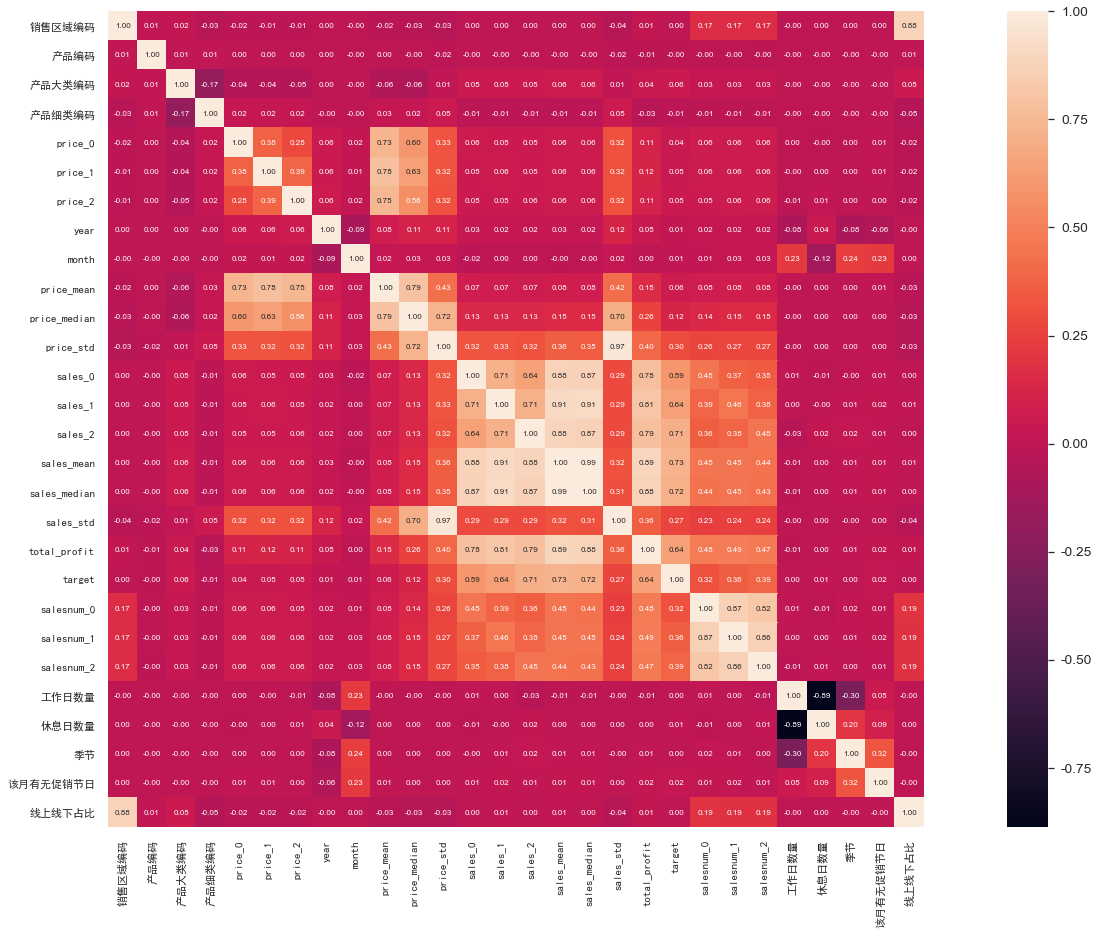

In [41]:
sns.set(font='SimHei')
# 使用 seaborn 画热力图
data123=melt_data.copy(deep=True)
data123 = data123.corr()
fig,ax = plt.subplots(figsize=(30,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(data123, 
                 cbar=True, 
                 annot=True, # 注入数字
                 square=True, # 单元格为正方形
                 fmt='.2f',   # 字符串格式代码
                  annot_kws={'size': 8} # 当annot为True时，ax.text的关键字参数，即注入数字的字体大小
                  )
plt.show()


In [42]:
# param = {
# #     'boosting':'dart',
#     'max_depth': 10,
#     'eta': 0.01,
#     'num_leaves':20,
#     'objective': 'regression_l2',
#     'verbose': 0,
#     'metric': ['l2'],
# }
# evals_result = {}
# valid_sets = [dtrain, dtest]
# valid_name = ['train', 'eval']
# feature_name = list(X.columns)



# model = lgb.train(
#     param,
#     dtrain,
#     num_boost_round=1000,
#     feature_name=feature_name,
#     valid_sets=valid_sets,
#     valid_names=valid_name,
#     evals_result=evals_result,
#     early_stopping_rounds=20)
# metric = 'l2'
# fig, ax = plt.subplots()
# ax.plot(evals_result['train'][metric], label='Train')
# ax.plot(evals_result['eval'][metric], label='Test')
# ax.legend()
# plt.ylabel(f'{metric}')
# plt.title(f'XGBoost {metric}')
# plt.show()
# # evals_result

In [43]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

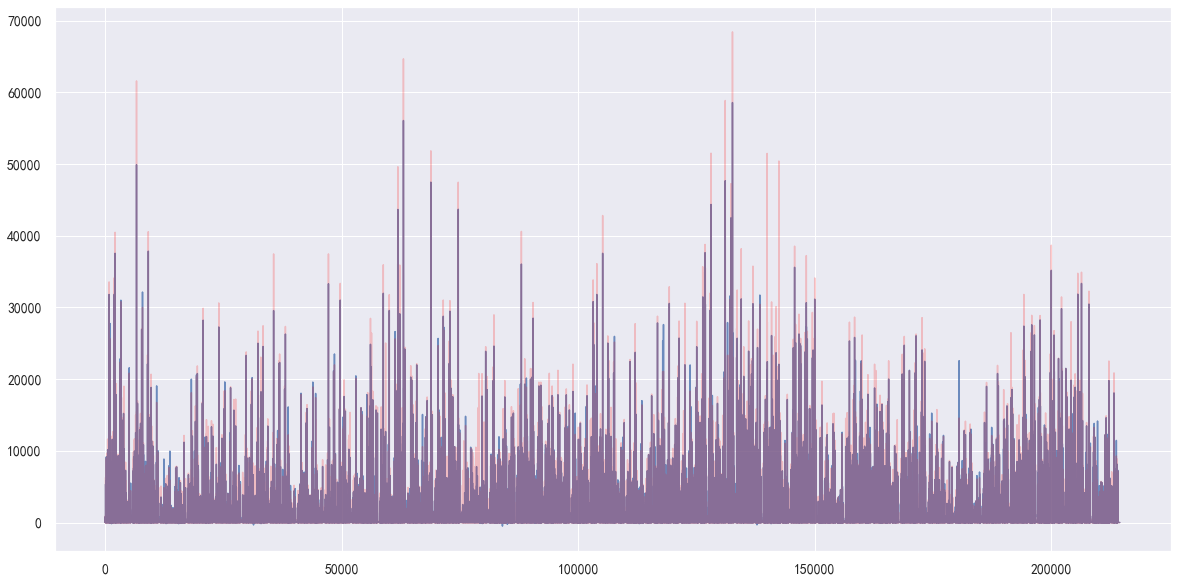

In [44]:
# y_hat = model.predict(X.values)
# fig, ax = plt.subplots(2, 1)
fig = plt.figure(figsize=(20,10))
plt.plot(test_data[0],alpha=0.8)
plt.plot(y.values,alpha=0.2,color='red')


销售区域编码          False
产品编码            False
产品大类编码          False
产品细类编码          False
price_0         False
price_1         False
price_2         False
year            False
month           False
price_mean      False
price_median    False
price_std       False
sales_0         False
sales_1         False
sales_2         False
sales_mean      False
sales_median    False
sales_std       False
total_profit    False
salesnum_0      False
salesnum_1      False
salesnum_2      False
季节              False
该月有无促销节日        False
线上线下占比          False
工作日数量           False
休息日数量           False
target          False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2619 entries, 0 to 2618
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   销售区域编码        2619 non-null   int64  
 1   产品编码          2619 non-null   int64  
 2   产品大类编码        2619 non-null   int64  
 3   产品细类编码        2619 non-null   int64  
 4   pr

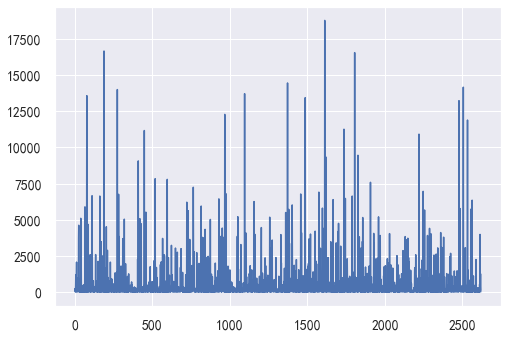

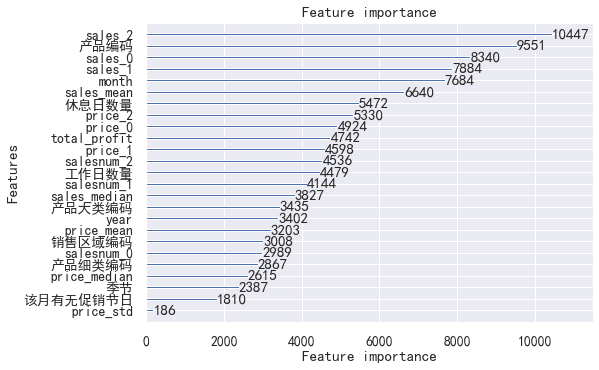

<Figure size 2160x1080 with 0 Axes>

,销售区域编码,产品编码,产品大类编码,产品细类编码,订单需求量
0,101,20002,303,406,111.098692
1,101,20003,301,405,243.829680
2,101,20006,307,403,168.598883
3,101,20011,303,401,20.634994
4,101,20014,307,403,94.765361
...,...,...,...,...,...
2614,105,22066,307,403,3990.625939
2615,105,22072,305,412,467.108607
2616,105,22075,307,403,112.043952
2617,105,22083,303,401,1269.675100


In [45]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))
melt_test_df['target'] = model.predict(melt_test_df.values,predict_disable_shape_check=True)
# melt_test_df.reset_index(inplace=True)
# melt_test_df['target'].plot()
result = pd.merge(
    final_test_df,
    melt_test_df,
    left_on=[
        '销售区域编码','产品编码','产品大类编码','产品细类编码'],
    right_on=[
        '销售区域编码','产品编码','产品大类编码','产品细类编码'],
    how='left')
print(result.isna().any())
print(result.info())
# result.fillna(0, inplace=True)
# result['ID'] = result.index
result.rename({'target': '订单需求量'}, inplace=True, axis=1)
result['订单需求量'].clip(0,inplace=True)
result['订单需求量'].plot()
# result[['ID', 'item_cnt_month']].to_csv('submission.csv', index=False)
lgb.plot_importance(model)
plt.figure(figsize=(30,15))
plt.show()
result[['销售区域编码','产品编码','产品大类编码','产品细类编码','订单需求量']]

In [46]:
kong_df=result.copy(deep=True)
kong_df=kong_df[['销售区域编码','产品编码','产品大类编码','产品细类编码']]
for i in range(1,4):
    id = sales_per_month.iloc[:, 0:feature_start_index]
    id.columns = ['销售区域编码','产品编码','产品大类编码','产品细类编码']  
    # cate_id = sales_per_month.iloc[:, -1]
    # cate_id.name = 'item_category_id'
    sales = sales_per_month.iloc[:, feature_start_index +
                                 one_catgory_feature_num -
                                 feature_loop_index:feature_start_index +
                                 one_catgory_feature_num]
    sales.columns = [f'sales_{i}' for i in range(feature_loop_index)]
    price = sales_per_month.iloc[:, feature_start_index +
                                 one_catgory_feature_num +
                                 one_catgory_feature_num -
                                 feature_loop_index:feature_start_index +
                                 one_catgory_feature_num +
                                 one_catgory_feature_num]
    
    salesnum=sales_per_month.iloc[:, feature_start_index +
                                 one_catgory_feature_num +
                                 one_catgory_feature_num +
                                 one_catgory_feature_num -
                                 feature_loop_index:feature_start_index +
                                 one_catgory_feature_num +
                                 one_catgory_feature_num +
                                 one_catgory_feature_num]
    # month_period=sales_per_month.iloc[:, feature_start_index +
    #                              one_catgory_feature_num +
    #                              one_catgory_feature_num +
    #                              one_catgory_feature_num +
    #                              one_catgory_feature_num -
    #                              feature_loop_index:feature_start_index +
    #                              one_catgory_feature_num +
    #                              one_catgory_feature_num +
    #                              one_catgory_feature_num +
    #                              one_catgory_feature_num]
    # print(salesnum)
    price.columns = [f'price_{i}' for i in range(feature_loop_index)]
    salesnum.columns = [f'salesnum_{i}' for i in range(feature_loop_index)]
    price['year'] = 2019
    price['month'] = i
    
    # more features
    total_profit= porudct_sum(sales,price,name='total_profit')
    sales = create_statistic_feature(sales, prefix='sales')
    price = create_statistic_feature(price, prefix='price')
    
    melt_test_df = pd.concat([id, price, sales,total_profit,salesnum], axis=1)
    melt_test_df['季节'] = melt_test_df['month'].apply(lambda x: 
                                        1 if x in [3, 4, 5] 
                                        else (2 if x in [6, 7, 8] 
                                        else (3 if x in [9, 10, 11] 
                                        else 4)))
    melt_test_df['该月有无促销节日'] = melt_test_df['month'].apply(lambda x: 
                                        1 if x in [1,3,6,10,11,12] 
                                        else 0)
    melt_test_df['线上线下占比'] = melt_test_df['销售区域编码'].apply(lambda x: 
                                        1 if x in [101,102,103] 
                                        else (2 if x in [104,105]
                                        else 0))
    melt_test_df=pd.merge(melt_test_df,df_time,how='left')
    melt_test_df['target'] = model.predict(melt_test_df.values,predict_disable_shape_check=True)
    # melt_test_df.reset_index(inplace=True)
    # melt_test_df['target'].plot()
    result = pd.merge(
        final_test_df,
        melt_test_df,
        left_on=[
            '销售区域编码','产品编码','产品大类编码','产品细类编码'],
        right_on=[
            '销售区域编码','产品编码','产品大类编码','产品细类编码'],
        how='left')
    # result.fillna(0, inplace=True)
    # result['ID'] = result.index
    result.rename({'target': '%s月订单需求量'%i}, inplace=True, axis=1)
    result['%s月订单需求量'%i].clip(0,inplace=True)
#     result['订单需求量'].plot()
    # result[['ID', 'item_cnt_month']].to_csv('submission.csv', index=False)
    kong_df=pd.concat([kong_df,result[['%s月订单需求量'%i]]],axis=1)

In [47]:
kong_df=round(kong_df,0)

In [48]:
kong_df.to_csv('./月粒度滑动预测结果.xlsx')

In [54]:
def set_index(data_first):
    data_second = data_first.iloc[:,1:5]
    data_second=data_second.rename(columns={'销售区域编码':'sales_region_code','产品编码':'item_code',
                                           '产品大类编码':'first_cate_code','产品细类编码':'second_cate_code'})
#     data_second.columns=['订单日期','销售区域编码','产品编码','产品大类编码','产品细类编码','销售渠道名称','产品价格','订单需求量']
    return data_second
kong_df = set_index(kong_df)

In [55]:
kong_df.to_csv('./result1.xlsx')